# CBC Data Exploration
### Purpose


### Author: 
Hamza
### Date: 
2020-06-04
### Update Date: 
tbd

### Inputs 
cbc_effort_weather_1900-2018.txt - Tab seperated file of Christmas Bird Count events going back to 1900. Each row represents a single count in a given year. Data Dictonary can be found here: http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf

### Output Artifcats
Plots and properties of the data

## Steps or Proceedures in the notebook 
 - load data from the Audubon Society
 - make some pictures
 - look at the pictures


## Where the Data will Be Saved 
n/a

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH_TO_RAW_CBC_DATA = "../data/Cloud_Data/cbc_effort_weather_1900-2018.txt"

In [4]:
raw_data = pd.read_csv(PATH_TO_RAW_CBC_DATA, encoding = "ISO-8859-1", sep="\t")

## typing

In [5]:
raw_data.dtypes

circle_name            object
country_state          object
lat                   float64
lon                   float64
count_year              int64
count_date             object
n_field_counters      float64
n_feeder_counters     float64
min_field_parties     float64
max_field_parties     float64
field_hours           float64
feeder_hours          float64
nocturnal_hours       float64
field_distance        float64
nocturnal_distance    float64
distance_units         object
min_temp              float64
max_temp              float64
temp_unit             float64
min_wind              float64
max_wind              float64
wind_unit             float64
min_snow              float64
max_snow              float64
snow_unit             float64
am_cloud              float64
pm_cloud              float64
am_rain                object
pm_rain                object
am_snow                object
pm_snow                object
dtype: object

pandas makes things a float if they having missing values or are fractional.

lets explore:
 - n_field_counters
 - n_feeder_counters
 - min_field_parties
 - max_field_parties

aditionally, data dictionary says "nearest degree, in degrees F", so I expect `int` for:
 - min_temp
 - max_temp

### lets see if the raw data string have fractional parts

In [6]:
raw_strs = pd.read_csv(PATH_TO_RAW_CBC_DATA, sep="\t", dtype=str, encoding = "ISO-8859-1", na_filter=False, 
                         usecols=["n_field_counters", "n_feeder_counters", "min_field_parties", "max_field_parties", "min_temp", "max_temp"])

In [7]:
raw_strs.min_field_parties.str.contains(".", regex=False).sum()

0

In [8]:
raw_strs.n_feeder_counters.str.contains(".", regex=False).sum()

0

In [9]:
raw_strs.max_field_parties.str.contains(".", regex=False).sum()

0

In [10]:
raw_strs.n_field_counters.str.contains(".", regex=False).sum()

47

fractional counters.
children?

In [11]:
raw_data.loc[raw_strs.n_field_counters.str.contains(".", regex=False), ("circle_name", "count_year", "n_field_counters")]

,circle_name,count_year,n_field_counters
30,Greater Boston,1902,1.500000
78,Princeton,1903,1.500000
119,Cambridge,1904,1.500000
141,Moorestown,1904,1.500000
223,New York City: Central Park,1905,1.250000
321,New York City: Central Park,1906,1.333333
329,Philadelphia,1906,1.500000
366,Chicago,1907,1.333333
379,Belmont,1907,2.500000
415,Minneapolis (north),1907,1.500000


no obvious patterns in location, except they are all befor the 1960s

by time

#### fractional temp

In [112]:
raw_strs.min_temp.str.contains(".", regex=False).sum()

328

In [120]:
raw_data.loc[raw_strs.min_temp.str.contains(".", regex=False), ("circle_name", "count_year", "min_temp", "temp_unit")]

,count_year,min_temp,temp_unit
60908,1997,27.5,2.0
89673,2011,8.5,2.0
89736,2012,-6.4,1.0
89753,2012,1.6,1.0
89767,2012,-2.5,1.0
...,...,...,...
106726,2018,-9.5,2.0
106838,2018,19.8,2.0
106840,2018,30.7,2.0
106879,2018,11.4,2.0


In [113]:
raw_strs.max_temp.str.contains(".", regex=False).sum()

329

In [121]:
raw_data.loc[raw_strs.max_temp.str.contains(".", regex=False), ("circle_name", "count_year", "max_temp", "temp_unit")]

,count_year,max_temp,temp_unit
68356,2001,35.5,2.0
70332,2002,41.5,2.0
81177,2008,2.5,1.0
89736,2012,-3.8,1.0
89753,2012,2.8,1.0
...,...,...,...
106647,2018,29.9,2.0
106726,2018,9.3,2.0
106838,2018,26.1,2.0
106879,2018,26.6,2.0


looks like people have been violating audubon specifications:  
seems to be a recent change (circa 2000's) where an extra sig fig was added to temp measurements, regardless of F or C

are they coincident?

In [15]:
# cross correlation
sum(raw_strs.max_temp.str.contains(".", regex=False) & raw_strs.min_temp.str.contains(".", regex=False))

241

241 out of the 328 min temp measurments and 329 of the max temp measurements happen at the same time

In [43]:
241/328 * 100

73.47560975609755

## a look at the sky (`*_cloud`, `*_rain`, `*_snow`)

### clouds

In [58]:
raw_data.am_cloud.value_counts()

2.0    28165
1.0    23168
6.0    17735
3.0     5150
5.0     5041
7.0     2089
4.0     1051
Name: am_cloud, dtype: int64

In [61]:
raw_data.am_cloud.isna().sum()

24530

In [59]:
raw_data.pm_cloud.value_counts()

2.0    26844
6.0    22354
1.0    21921
5.0     7235
7.0     2202
3.0     1369
4.0      346
Name: pm_cloud, dtype: int64

In [62]:
raw_data.pm_cloud.isna().sum()

24658

for both cases, they use the unknown tag (cloud == 7) and leave it blank/na

### rain

so ... the rain was noted as "unknown and none", "heavy and unknown" ...

In [52]:
raw_data.am_rain.value_counts()

3        43253
4        27695
2         8398
1         1202
2,1        503
3,2        440
3,2,1      154
3,1         26
2,3          5
3,4          4
1,2          3
1,2,3        1
1,4          1
Name: am_rain, dtype: int64

In [63]:
raw_data.am_rain.isna().sum()

25244

In [49]:
raw_data.pm_rain.value_counts()

3        44085
4        27743
2         7388
1         1293
2,1        498
3,2        401
3,2,1      132
3,1         26
2,3          9
3,4          5
2,4          2
1,2          1
1,4          1
1,3          1
Name: pm_rain, dtype: int64

In [64]:
raw_data.pm_rain.isna().sum()

25344

### snow

same for snow, unknown is mixed with other, known conditions or left blank

In [53]:
raw_data.am_snow.value_counts()

3        44381
4        27502
2         7913
1         1107
2,1        251
3,2        246
3,2,1       50
3,1         24
3,4          8
1,2,3        2
2,3          1
2,4          1
1,2          1
Name: am_snow, dtype: int64

In [65]:
raw_data.am_snow.isna().sum()

25442

In [54]:
raw_data.pm_snow.value_counts()

3        44893
4        27589
2         7176
1         1170
2,1        295
3,2        217
3,2,1       50
3,1         11
3,4          5
2,3          4
2,4          1
1,2          1
1,3          1
Name: pm_snow, dtype: int64

In [66]:
raw_data.pm_snow.isna().sum()

25516

## the NaNs

cross-correlation of nans, to see how often two coloumns are nan at the same time   
**this is not the probability and statics cross correlation, but the signal processing similarity measure for time series**

In [112]:
def nan_xcorr(a, b):
    return np.logical_and(a, b).sum()

In [115]:
data_nan_xcorr = raw_data.isna().corr(method=nan_xcorr)

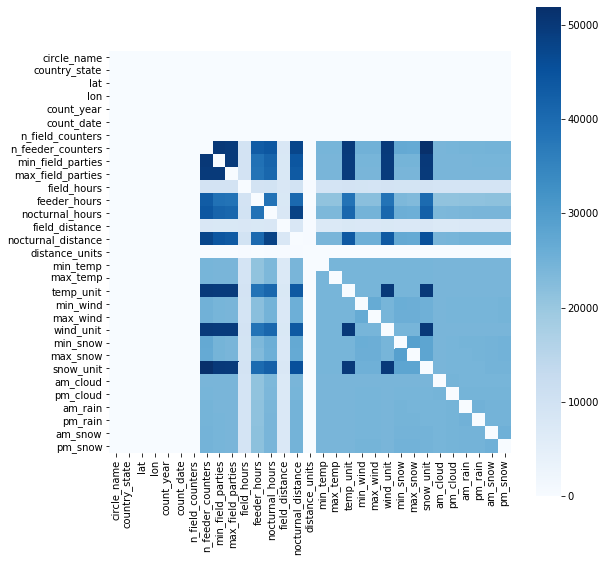

In [126]:
plt.figure(figsize=(9, 9))
sns.heatmap(data_nan_xcorr, vmin = 0, square=True, cmap="Blues")

nocturnal distance and hours are nan together, as are the temp/wind/snow units   
additionally, the different units are highly temporally correlated to n_feeder_counters and min/max_field_parties

In [136]:
def nan_xcorr_scaled(a, b):
    denom = a.sum() * b.sum()
    return 0 if denom == 0 else np.logical_and(a, b).sum() / np.sqrt(denom)

In [137]:
data_nan_xcorr_scaled = raw_data.isna().corr(method=nan_xcorr_scaled)

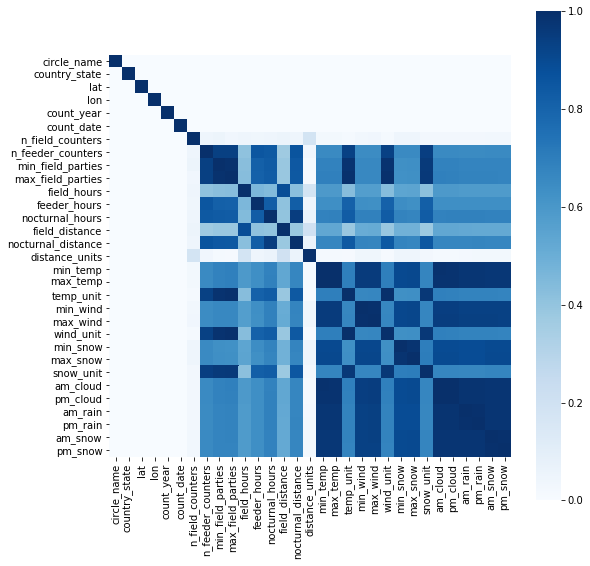

In [138]:
plt.figure(figsize=(9, 9))
sns.heatmap(data_nan_xcorr_scaled, vmin = 0, square=True, cmap="Blues")

it is fair to say the weather information (except for the units) are all coincident, where as the  count and hour information are related to each other

## n_field_counters

In [12]:
sum(np.isnan(raw_data.n_field_counters)) / len(raw_data) * 100

0.2048087983615296

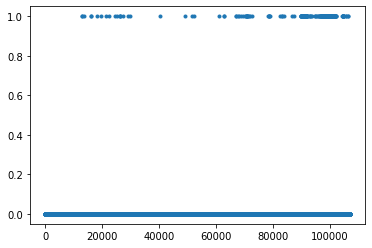

In [13]:
plt.plot( np.isnan(raw_data.n_field_counters), ".")

### n_feeder_counters

In [100]:
sum(np.isnan(raw_data.n_feeder_counters)) / len(raw_data) * 100

52.699454778404366

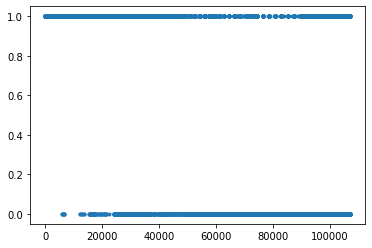

In [96]:
plt.plot( np.isnan(raw_data.n_feeder_counters), ".")

### min_field_parties

In [102]:
sum(np.isnan(raw_data.min_field_parties)) / len(raw_data) * 100

47.429602820563176

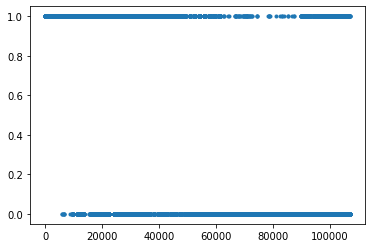

In [103]:
plt.plot( np.isnan(raw_data.min_field_parties), ".")

### max_field_parties

In [105]:
sum(np.isnan(raw_data.max_field_parties)) / len(raw_data) * 100

46.603821227169426

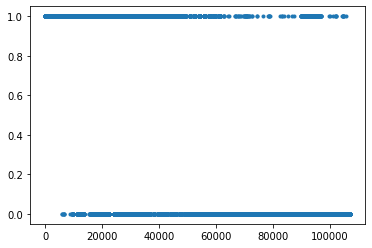

In [106]:
plt.plot( np.isnan(raw_data.max_field_parties), ".")

celcius wasnt discoverd until the 1990's, apparently 

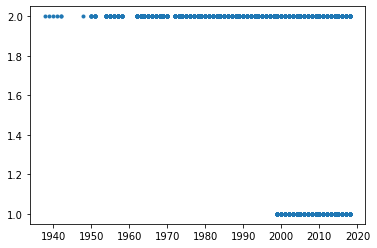

In [13]:
plt.plot(raw_data.count_year, raw_data.temp_unit, "." )

In [25]:
np.sum( np.isnan(raw_data.temp_unit)) / len(raw_data)

0.4666647962666816

In [28]:
np.sum( raw_data.temp_unit == 1) / len(raw_data)

0.062144039502847685

In [16]:
sum( raw_data.temp_unit == np.nan )

0